## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [1]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [3]:
# How many distinct colors are available?
num_colors=colors.shape[0]
#print(num_colors)

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [4]:
# colors_summary: Distribution of colors based on transparency
#print(colors)
colors_summary=colors.groupby('is_trans').count()
print(colors_summary)


           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

    year  num_parts
0   1970      84.79
1   1978     146.62
2   1987      70.00
3   1979     105.41
4   1976     153.03
5   1965     107.10
6   1985     122.06
7   1968     127.20
8   1999     105.54
9   1967      98.67
10  1969      64.59
11  2001     104.37
12  1966      40.65
13  2003     159.68
14  2002     115.70
15  2004     138.86
16  2006     246.90
17  2005     198.75
18  2010     210.65
19  2007     229.03
20  2008     231.64
21  2009     196.90
22  2011     160.45
23  2012     149.81
24  2013     181.36
25  2014     169.32
26  2015     200.22
27  2016     248.95
28  2017     300.12
29  1977      91.50
..   ...        ...
36  1980     126.64
37  1982      69.38
38  1988     144.25
39  1997     129.22
40  1998     141.13
41  1971      67.02
42  1955      36.86
43  1956      18.50
44  1957      42.62
45  1958      44.45
46  1974     116.77
47  1972     102.84
48  1975     155.23
49  1992     119.62
50  1991     166.42
51  1989     102.06
52  1990     202.04
53  1993     148.43


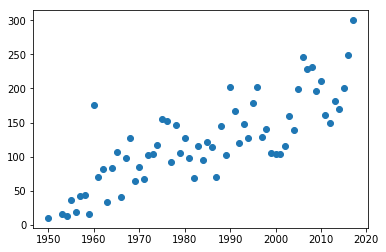

In [20]:
%matplotlib inline
# Read sets data as `sets`
sets=pd.read_csv("datasets/sets.csv")
# Create a summary of average number of parts by year: `parts_by_year`
Parts_by_year = sets[['year', 'num_parts']]
def calculation_item(filter):
    my_data={}
    for key , value in filter.iterrows():
        if value[0] in my_data.keys():
            my_data[value[0]]+=value[1]
        else:
            my_data[value[0]]=value[1]
    #print(my_plot_data)
    return my_data
def calculation_number(filter):
    my_data={}
    for key , value in filter.iterrows():
        if value[0] in my_data.keys():
            my_data[value[0]]+=1
        else:
            my_data[value[0]]=1
    return my_data
my_plot_data=calculation_item(Parts_by_year)
my_plot_number=calculation_number(Parts_by_year)
def make_as_a_dataframe(data,number):
    year_list_inside=[]
    ave_num_inside=[]
    for year in number.keys():
        year_list_inside.append(year)
        ave_num_inside.append(round(data[year]/number[year],2))

    new_dict={
        "year":year_list_inside,
        "num_parts":ave_num_inside
        }
    return pd.DataFrame(new_dict)
parts_by_year=make_as_a_dataframe(my_plot_data,my_plot_number)
print(parts_by_year)
plt.scatter(x=parts_by_year[['year']],y=parts_by_year[['num_parts']])
plt.show()

## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [6]:
# themes_by_year: Number of themes shipped by year
themes_by=sets[['year','theme_id']]
#print(themes_by_year)
number_theme=calculation_number(themes_by)
#print(number_theme)
year=[]
theme=[]
for key in number_theme.keys():
    year.append(key)
    theme.append(number_theme[key])
new_dict_2={
    "year":year,
    "theme_id":theme
}
themes_by_year=pd.DataFrame(new_dict_2)
print(themes_by_year.head())

   year  theme_id
0  1970        29
1  1978        73
2  1987       209
3  1979        82
4  1976        68


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [7]:
# Nothing to do here